# MAZ Diplomarbeit - Biodiversität in der Schweiz#

Ein Teil der vorhandenen Daten sind "alte" pdf. Es gibt sie in zwei Kategorien, als Text-pdf und als Bild-pdf. Ich beginne mit Tabula, falls das Bild-pdf nicht eingelesen werden kann, werde ich Tesseract anwenden.
Alle Daten konnten mit Tabula als csv gewandelt werden. Ich habe sie vorab bereinigt. Nun geht es darum, die Datensätze in Pandas so anzupassen, dass ich zum Schluss einzelne Tiergruppen (Beispiel: Insekten), die nun alle einzeln sind, zusammenfassen kann. Benötige ich für die Darstellung des Overviews der Tiergruppen.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("01_source/tabula_ch/tabula_ epiphytische_flechten.csv")

In [3]:
df.head()

,Art,CH
0,Acrocordia cavata (Ach.) R.C.Harris 1974,NT
1,Acrocordia gemmata (Ach.) A. Massal. 1854,NT
2,Agonimia allobata (Stizenb.) P.James 1992,LC
3,Agonimia octospora Coppins & P.James 1978,EN
4,Agonimia tristicula (Nyl.) Zahlbr. 1909,LC


Überblick über das File verschaffen...

In [4]:
len (df)

521

In [5]:
df.shape

(521, 2)

Da ich diese Files appenden werde, kümmere ich mich gleich zu Beginn um die gleichen Index-Titel und füge unten auch noch zwei Spalten an, eine für den Namen der Familie (z.B. Schmetterlinge), die andere für  den Namen der Gruppe (Insekten).

In [6]:
df.rename(columns={"Art":"sc name","CH":"cat"},inplace=True)

In [7]:
df.head(3)

,sc name,cat
0,Acrocordia cavata (Ach.) R.C.Harris 1974,NT
1,Acrocordia gemmata (Ach.) A. Massal. 1854,NT
2,Agonimia allobata (Stizenb.) P.James 1992,LC


In [9]:
df['einteilung'] = 'Pflanzen'
df['untergruppe'] = 'epiphytische Flechten'

In [10]:
df.head(2)

,sc name,cat,einteilung,untergruppe
0,Acrocordia cavata (Ach.) R.C.Harris 1974,NT,Pflanzen,epiphytische Flechten
1,Acrocordia gemmata (Ach.) A. Massal. 1854,NT,Pflanzen,epiphytische Flechten


In [11]:
df["cat"].value_counts()

LC     200
EN      87
VU      86
NT      84
CR      34
RE      22
DD       7
CR       1
Name: cat, dtype: int64

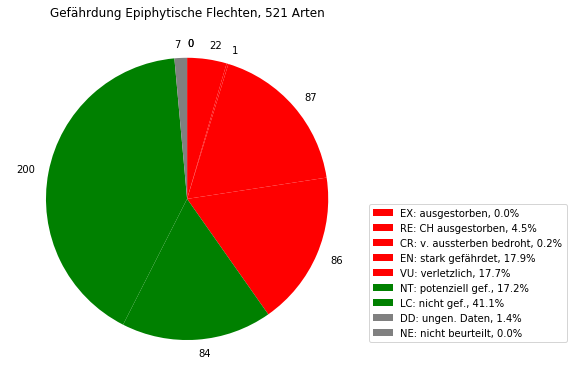

In [12]:
values = [0, 22, 1, 87, 86, 84, 200, 7, 0]
colors = ['r', 'r', 'r', 'r', 'r', 'g', "g", "grey", "grey"]
labels = [
    'EX: ausgestorben', 'RE: CH ausgestorben',
    'CR: v. aussterben bedroht', 'EN: stark gefährdet', 
    'VU: verletzlich',"NT: potenziell gef.",
    "LC: nicht gef.","DD: ungen. Daten","NE: nicht beurteilt"]


fig1, ax1 = plt.subplots(figsize=(7, 6))
fig1.subplots_adjust(0.3,0,1,1)
plt.pie(values, colors=colors, labels= values, counterclock=False,startangle=90)
plt.title('Gefährdung Epiphytische Flechten, 521 Arten')
total = sum(values)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, values)],
    
    bbox_to_anchor=(1.0, 0.5),
    bbox_transform=fig1.transFigure
)
plt.show()